# Integrantes
- Diego Costa Silva - RM552648
- Lucas Minozzo Bronzeri - RM553745
- Thaís Ribeiro Asfur - RM553870

# Baixando bibliotecas...

In [125]:
!pip install --quiet -r requirements.txt


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Fazendo IMPORTs...

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, AutoDateLocator
from windrose import WindroseAxes
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from pymongo import MongoClient
from pymongo import UpdateOne
from bson import ObjectId

plt.style.use('fivethirtyeight')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Salvando .CSV em uma variavel, vendo os 5 primeiros dados e fazendo o tratamento dos dados.

In [127]:
df_sp = pd.read_csv("dados_sp_classificados_modificado.csv")
df_sp.head()

,data,hora_utc,"precipitacao_total,_horario_(mm)","pressao_atmosferica_ao_nivel_da_estacao,_horaria_(mb)",pressao_atmosferica_max.na_hora_ant._(aut)_(mb),pressao_atmosferica_min._na_hora_ant._(aut)_(mb),radiacao_global_(kj/m2),"temperatura_do_ar_-_bulbo_seco,_horaria_(c)",temperatura_do_ponto_de_orvalho_(c),temperatura_maxima_na_hora_ant._(aut)_(c),temperatura_minima_na_hora_ant._(aut)_(c),temperatura_orvalho_max._na_hora_ant._(aut)_(c),temperatura_orvalho_min._na_hora_ant._(aut)_(c),umidade_rel._max._na_hora_ant._(aut)_(%),umidade_rel._min._na_hora_ant._(aut)_(%),"umidade_relativa_do_ar,_horaria_(%)","vento,_direcao_horaria_(gr)_(_(gr))","vento,_rajada_maxima_(m/s)","vento,_velocidade_horaria_(m/s)",estacao,latitude,longitude,altitude,precipitacao_total,_horario_(mm),pressao_atmosferica_max.na_hora_ant._(aut)_(mb).1,pressao_atmosferica_min._na_hora_ant._(aut)_(mb).1,precipitacao,temperatura,vento_rajada,classificacao
0,2024/01/01,0000 UTC,0,"926,9","926,9","926,4",NaN,"19,5",15,"19,9","19,4","15,2","14,5",76.00,71.00,75.00,161.00,"8,8","3,4",MIRANTE,-23.50,-46.62,785.64,NaN,NaN,NaN,NaN,0.00,19.50,8.80,NORMAL
1,2024/01/01,0100 UTC,0,"927,6","927,6","926,9",NaN,"19,3","14,8","19,6","19,3",15,"14,7",76.00,74.00,75.00,156.00,"8,8",3,MIRANTE,-23.50,-46.62,785.64,NaN,NaN,NaN,NaN,0.00,19.30,8.80,NORMAL
2,2024/01/01,0200 UTC,0,"927,1","927,7","927,1",NaN,19,"14,6","19,4",19,"14,9","14,6",76.00,75.00,75.00,151.00,"8,1",3,MIRANTE,-23.50,-46.62,785.64,NaN,NaN,NaN,NaN,0.00,19.00,8.10,NORMAL
3,2024/01/01,0300 UTC,0,"927,2","927,3",927,NaN,"19,2","13,8","19,2",19,"14,6","13,7",75.00,71.00,71.00,150.00,"6,7","2,1",MIRANTE,-23.50,-46.62,785.64,NaN,NaN,NaN,NaN,0.00,19.20,6.70,NORMAL
4,2024/01/01,0400 UTC,0,"926,3","927,2","926,3",NaN,"18,9","13,4","19,2","18,8","13,8","13,3",71.00,69.00,70.00,143.00,"6,3","2,2",MIRANTE,-23.50,-46.62,785.64,NaN,NaN,NaN,NaN,0.00,18.90,6.30,NORMAL


In [128]:
df_sp.describe()

,umidade_rel._max._na_hora_ant._(aut)_(%),umidade_rel._min._na_hora_ant._(aut)_(%),"umidade_relativa_do_ar,_horaria_(%)","vento,_direcao_horaria_(gr)_(_(gr))",latitude,longitude,altitude,precipitacao_total,_horario_(mm),pressao_atmosferica_max.na_hora_ant._(aut)_(mb).1,pressao_atmosferica_min._na_hora_ant._(aut)_(mb).1,precipitacao,temperatura,vento_rajada
count,81519.00,81518.00,81622.00,80131.00,96463.00,96463.00,96463.00,0.00,0.00,0.00,0.00,77882.00,85181.00,71863.00
mean,73.32,67.73,70.58,169.49,-22.93,-48.16,722.56,NaN,NaN,NaN,NaN,0.15,21.87,4.96
std,19.90,21.40,20.74,94.55,1.09,1.51,388.52,NaN,NaN,NaN,NaN,1.14,5.39,2.61
min,11.00,9.00,10.00,1.00,-24.67,-51.41,2.70,NaN,NaN,NaN,NaN,0.00,-2.00,0.00
25%,60.00,52.00,56.00,103.00,-23.89,-49.03,500.00,NaN,NaN,NaN,NaN,0.00,18.40,3.10
50%,78.00,71.00,75.00,145.00,-23.00,-47.88,710.00,NaN,NaN,NaN,NaN,0.00,21.70,4.70
75%,90.00,86.00,89.00,236.00,-22.12,-47.38,859.29,NaN,NaN,NaN,NaN,0.00,25.40,6.60
max,100.00,100.00,100.00,360.00,-20.58,-45.60,1662.95,NaN,NaN,NaN,NaN,48.80,40.10,35.00


In [129]:
df_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96463 entries, 0 to 96462
Data columns (total 31 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   data                                                   96463 non-null  object 
 1   hora_utc                                               96463 non-null  object 
 2   precipitacao_total,_horario_(mm)                       77882 non-null  object 
 3   pressao_atmosferica_ao_nivel_da_estacao,_horaria_(mb)  85138 non-null  object 
 4   pressao_atmosferica_max.na_hora_ant._(aut)_(mb)        85168 non-null  object 
 5   pressao_atmosferica_min._na_hora_ant._(aut)_(mb)       85168 non-null  object 
 6   radiacao_global_(kj/m2)                                52324 non-null  object 
 7   temperatura_do_ar_-_bulbo_seco,_horaria_(c)            85181 non-null  object 
 8   temperatura_do_ponto_de_orvalho_(c)           

Dropando algumas colunas duplicadas

In [130]:
df_sp = df_sp.drop(columns=['precipitacao_total','_horario_(mm)','pressao_atmosferica_max.na_hora_ant._(aut)_(mb).1','pressao_atmosferica_min._na_hora_ant._(aut)_(mb).1'])

In [131]:
df_sp.head()

,data,hora_utc,"precipitacao_total,_horario_(mm)","pressao_atmosferica_ao_nivel_da_estacao,_horaria_(mb)",pressao_atmosferica_max.na_hora_ant._(aut)_(mb),pressao_atmosferica_min._na_hora_ant._(aut)_(mb),radiacao_global_(kj/m2),"temperatura_do_ar_-_bulbo_seco,_horaria_(c)",temperatura_do_ponto_de_orvalho_(c),temperatura_maxima_na_hora_ant._(aut)_(c),temperatura_minima_na_hora_ant._(aut)_(c),temperatura_orvalho_max._na_hora_ant._(aut)_(c),temperatura_orvalho_min._na_hora_ant._(aut)_(c),umidade_rel._max._na_hora_ant._(aut)_(%),umidade_rel._min._na_hora_ant._(aut)_(%),"umidade_relativa_do_ar,_horaria_(%)","vento,_direcao_horaria_(gr)_(_(gr))","vento,_rajada_maxima_(m/s)","vento,_velocidade_horaria_(m/s)",estacao,latitude,longitude,altitude,precipitacao,temperatura,vento_rajada,classificacao
0,2024/01/01,0000 UTC,0,"926,9","926,9","926,4",NaN,"19,5",15,"19,9","19,4","15,2","14,5",76.00,71.00,75.00,161.00,"8,8","3,4",MIRANTE,-23.50,-46.62,785.64,0.00,19.50,8.80,NORMAL
1,2024/01/01,0100 UTC,0,"927,6","927,6","926,9",NaN,"19,3","14,8","19,6","19,3",15,"14,7",76.00,74.00,75.00,156.00,"8,8",3,MIRANTE,-23.50,-46.62,785.64,0.00,19.30,8.80,NORMAL
2,2024/01/01,0200 UTC,0,"927,1","927,7","927,1",NaN,19,"14,6","19,4",19,"14,9","14,6",76.00,75.00,75.00,151.00,"8,1",3,MIRANTE,-23.50,-46.62,785.64,0.00,19.00,8.10,NORMAL
3,2024/01/01,0300 UTC,0,"927,2","927,3",927,NaN,"19,2","13,8","19,2",19,"14,6","13,7",75.00,71.00,71.00,150.00,"6,7","2,1",MIRANTE,-23.50,-46.62,785.64,0.00,19.20,6.70,NORMAL
4,2024/01/01,0400 UTC,0,"926,3","927,2","926,3",NaN,"18,9","13,4","19,2","18,8","13,8","13,3",71.00,69.00,70.00,143.00,"6,3","2,2",MIRANTE,-23.50,-46.62,785.64,0.00,18.90,6.30,NORMAL


In [132]:
df_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96463 entries, 0 to 96462
Data columns (total 27 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   data                                                   96463 non-null  object 
 1   hora_utc                                               96463 non-null  object 
 2   precipitacao_total,_horario_(mm)                       77882 non-null  object 
 3   pressao_atmosferica_ao_nivel_da_estacao,_horaria_(mb)  85138 non-null  object 
 4   pressao_atmosferica_max.na_hora_ant._(aut)_(mb)        85168 non-null  object 
 5   pressao_atmosferica_min._na_hora_ant._(aut)_(mb)       85168 non-null  object 
 6   radiacao_global_(kj/m2)                                52324 non-null  object 
 7   temperatura_do_ar_-_bulbo_seco,_horaria_(c)            85181 non-null  object 
 8   temperatura_do_ponto_de_orvalho_(c)           

Dropando linhas com dados faltantes

In [133]:
df_sp = df_sp.dropna()

df_sp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38893 entries, 9 to 96462
Data columns (total 27 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   data                                                   38893 non-null  object 
 1   hora_utc                                               38893 non-null  object 
 2   precipitacao_total,_horario_(mm)                       38893 non-null  object 
 3   pressao_atmosferica_ao_nivel_da_estacao,_horaria_(mb)  38893 non-null  object 
 4   pressao_atmosferica_max.na_hora_ant._(aut)_(mb)        38893 non-null  object 
 5   pressao_atmosferica_min._na_hora_ant._(aut)_(mb)       38893 non-null  object 
 6   radiacao_global_(kj/m2)                                38893 non-null  object 
 7   temperatura_do_ar_-_bulbo_seco,_horaria_(c)            38893 non-null  object 
 8   temperatura_do_ponto_de_orvalho_(c)                

In [134]:
df_sp

,data,hora_utc,"precipitacao_total,_horario_(mm)","pressao_atmosferica_ao_nivel_da_estacao,_horaria_(mb)",pressao_atmosferica_max.na_hora_ant._(aut)_(mb),pressao_atmosferica_min._na_hora_ant._(aut)_(mb),radiacao_global_(kj/m2),"temperatura_do_ar_-_bulbo_seco,_horaria_(c)",temperatura_do_ponto_de_orvalho_(c),temperatura_maxima_na_hora_ant._(aut)_(c),temperatura_minima_na_hora_ant._(aut)_(c),temperatura_orvalho_max._na_hora_ant._(aut)_(c),temperatura_orvalho_min._na_hora_ant._(aut)_(c),umidade_rel._max._na_hora_ant._(aut)_(%),umidade_rel._min._na_hora_ant._(aut)_(%),"umidade_relativa_do_ar,_horaria_(%)","vento,_direcao_horaria_(gr)_(_(gr))","vento,_rajada_maxima_(m/s)","vento,_velocidade_horaria_(m/s)",estacao,latitude,longitude,altitude,precipitacao,temperatura,vento_rajada,classificacao
9,2024/01/01,0900 UTC,0,"925,6","925,8","925,6","47,6","18,5","14,3","18,6","18,4","14,3","13,9",77.00,74.00,77.00,128.00,6,"1,8",MIRANTE,-23.50,-46.62,785.64,0.00,18.50,6.00,NORMAL
10,2024/01/01,1000 UTC,0,926,926,"925,5","243,3",19,"14,9",19,"18,3","15,1","14,3",80.00,77.00,77.00,135.00,"7,2","2,7",MIRANTE,-23.50,-46.62,785.64,0.00,19.00,7.20,NORMAL
11,2024/01/01,1100 UTC,0,"926,1","926,1",926,"962,3","21,2","14,4","21,4","18,9","15,6","14,4",77.00,65.00,65.00,130.00,"7,9","2,9",MIRANTE,-23.50,-46.62,785.64,0.00,21.20,7.90,NORMAL
12,2024/01/01,1200 UTC,0,"926,7","926,7","926,1","1282,7","21,7","14,7","21,8","20,9","15,1","14,2",67.00,64.00,64.00,149.00,"7,2",3,MIRANTE,-23.50,-46.62,785.64,0.00,21.70,7.20,NORMAL
13,2024/01/01,1300 UTC,0,"926,9","926,9","926,7","1729,3","22,5","14,6","22,9","21,3","15,4","14,5",66.00,61.00,61.00,123.00,8,"3,1",MIRANTE,-23.50,-46.62,785.64,0.00,22.50,8.00,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96458,2024/12/25,0200 UTC,0,"963,1","963,2","962,7",0,"22,2","18,9","23,9","22,2",19,"18,8",81.00,73.00,81.00,117.00,"10,1","4,3",OURINHOS,-23.00,-49.84,500.00,0.00,22.20,10.10,NORMAL
96459,2024/12/25,0300 UTC,0,963,"963,2","962,9",0,"21,8","18,6","22,3","21,6","18,9","18,5",83.00,81.00,82.00,122.00,"9,4","5,3",OURINHOS,-23.00,-49.84,500.00,0.00,21.80,9.40,NORMAL
96460,2024/12/25,0400 UTC,0,"962,4","963,1","962,4",0,"20,9","18,6","21,8","20,8","18,7","18,4",87.00,82.00,86.00,122.00,"9,4","3,4",OURINHOS,-23.00,-49.84,500.00,0.00,20.90,9.40,NORMAL
96461,2024/12/25,0500 UTC,0,"961,9","962,4","961,8",0,"20,3","18,3","21,1","20,1","18,6","18,2",89.00,84.00,89.00,107.00,"8,6","2,6",OURINHOS,-23.00,-49.84,500.00,0.00,20.30,8.60,NORMAL


In [135]:
df_sp.describe()

,umidade_rel._max._na_hora_ant._(aut)_(%),umidade_rel._min._na_hora_ant._(aut)_(%),"umidade_relativa_do_ar,_horaria_(%)","vento,_direcao_horaria_(gr)_(_(gr))",latitude,longitude,altitude,precipitacao,temperatura,vento_rajada
count,38893.00,38893.00,38893.00,38893.00,38893.00,38893.00,38893.00,38893.00,38893.00,38893.00
mean,68.01,60.87,64.07,170.69,-23.01,-48.19,759.89,0.14,23.49,5.55
std,20.42,20.90,20.69,96.29,0.90,1.51,396.86,1.17,5.30,2.54
min,11.00,9.00,10.00,1.00,-24.67,-51.41,2.70,0.00,-0.10,0.00
25%,54.00,45.00,49.00,102.00,-23.89,-49.03,500.00,0.00,19.90,3.80
50%,71.00,62.00,66.00,149.00,-23.00,-48.00,710.00,0.00,23.40,5.30
75%,85.00,78.00,81.00,240.00,-22.36,-47.38,859.29,0.00,27.30,7.10
max,100.00,100.00,100.00,360.00,-20.58,-45.60,1662.95,48.80,40.10,35.00


Convertendo dados de numeros para int

In [136]:
colunas_numericas = [
    'precipitacao_total,_horario_(mm)',
    'pressao_atmosferica_ao_nivel_da_estacao,_horaria_(mb)',
    'pressao_atmosferica_max.na_hora_ant._(aut)_(mb)',
    'pressao_atmosferica_min._na_hora_ant._(aut)_(mb)',
    'radiacao_global_(kj/m2)',
    'temperatura_do_ar_-_bulbo_seco,_horaria_(c)',
    'temperatura_do_ponto_de_orvalho_(c)',
    'temperatura_maxima_na_hora_ant._(aut)_(c)',
    'temperatura_minima_na_hora_ant._(aut)_(c)',
    'temperatura_orvalho_max._na_hora_ant._(aut)_(c)',
    'temperatura_orvalho_min._na_hora_ant._(aut)_(c)',
    'vento,_rajada_maxima_(m/s)',
    'vento,_velocidade_horaria_(m/s)'
]

for coluna in colunas_numericas:
    df_sp[coluna] = (
        df_sp[coluna]
        .astype(str)
        .str.strip()
        .str.replace(',', '.', regex=False)
        .str.replace(r'[^\d\.\-]', '', regex=True)
    )
    df_sp[coluna] = pd.to_numeric(df_sp[coluna], errors='coerce')

df_sp['datahora'] = pd.to_datetime(df_sp['data'].astype(str).str.strip() + ' ' + df_sp['hora_utc'].astype(str).str.strip(), errors='coerce')

print(df_sp[colunas_numericas].notna().sum())

precipitacao_total,_horario_(mm)                         38893
pressao_atmosferica_ao_nivel_da_estacao,_horaria_(mb)    38893
pressao_atmosferica_max.na_hora_ant._(aut)_(mb)          38893
pressao_atmosferica_min._na_hora_ant._(aut)_(mb)         38893
radiacao_global_(kj/m2)                                  38893
temperatura_do_ar_-_bulbo_seco,_horaria_(c)              38893
temperatura_do_ponto_de_orvalho_(c)                      38893
temperatura_maxima_na_hora_ant._(aut)_(c)                38893
temperatura_minima_na_hora_ant._(aut)_(c)                38893
temperatura_orvalho_max._na_hora_ant._(aut)_(c)          38893
temperatura_orvalho_min._na_hora_ant._(aut)_(c)          38893
vento,_rajada_maxima_(m/s)                               38893
vento,_velocidade_horaria_(m/s)                          38893
dtype: int64


In [137]:
df_sp

,data,hora_utc,"precipitacao_total,_horario_(mm)","pressao_atmosferica_ao_nivel_da_estacao,_horaria_(mb)",pressao_atmosferica_max.na_hora_ant._(aut)_(mb),pressao_atmosferica_min._na_hora_ant._(aut)_(mb),radiacao_global_(kj/m2),"temperatura_do_ar_-_bulbo_seco,_horaria_(c)",temperatura_do_ponto_de_orvalho_(c),temperatura_maxima_na_hora_ant._(aut)_(c),temperatura_minima_na_hora_ant._(aut)_(c),temperatura_orvalho_max._na_hora_ant._(aut)_(c),temperatura_orvalho_min._na_hora_ant._(aut)_(c),umidade_rel._max._na_hora_ant._(aut)_(%),umidade_rel._min._na_hora_ant._(aut)_(%),"umidade_relativa_do_ar,_horaria_(%)","vento,_direcao_horaria_(gr)_(_(gr))","vento,_rajada_maxima_(m/s)","vento,_velocidade_horaria_(m/s)",estacao,latitude,longitude,altitude,precipitacao,temperatura,vento_rajada,classificacao,datahora
9,2024/01/01,0900 UTC,0.00,925.60,925.80,925.60,47.60,18.50,14.30,18.60,18.40,14.30,13.90,77.00,74.00,77.00,128.00,6.00,1.80,MIRANTE,-23.50,-46.62,785.64,0.00,18.50,6.00,NORMAL,2024-01-01 09:00:00+00:00
10,2024/01/01,1000 UTC,0.00,926.00,926.00,925.50,243.30,19.00,14.90,19.00,18.30,15.10,14.30,80.00,77.00,77.00,135.00,7.20,2.70,MIRANTE,-23.50,-46.62,785.64,0.00,19.00,7.20,NORMAL,2024-01-01 10:00:00+00:00
11,2024/01/01,1100 UTC,0.00,926.10,926.10,926.00,962.30,21.20,14.40,21.40,18.90,15.60,14.40,77.00,65.00,65.00,130.00,7.90,2.90,MIRANTE,-23.50,-46.62,785.64,0.00,21.20,7.90,NORMAL,2024-01-01 11:00:00+00:00
12,2024/01/01,1200 UTC,0.00,926.70,926.70,926.10,1282.70,21.70,14.70,21.80,20.90,15.10,14.20,67.00,64.00,64.00,149.00,7.20,3.00,MIRANTE,-23.50,-46.62,785.64,0.00,21.70,7.20,NORMAL,2024-01-01 12:00:00+00:00
13,2024/01/01,1300 UTC,0.00,926.90,926.90,926.70,1729.30,22.50,14.60,22.90,21.30,15.40,14.50,66.00,61.00,61.00,123.00,8.00,3.10,MIRANTE,-23.50,-46.62,785.64,0.00,22.50,8.00,NORMAL,2024-01-01 13:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96458,2024/12/25,0200 UTC,0.00,963.10,963.20,962.70,0.00,22.20,18.90,23.90,22.20,19.00,18.80,81.00,73.00,81.00,117.00,10.10,4.30,OURINHOS,-23.00,-49.84,500.00,0.00,22.20,10.10,NORMAL,2024-12-25 02:00:00+00:00
96459,2024/12/25,0300 UTC,0.00,963.00,963.20,962.90,0.00,21.80,18.60,22.30,21.60,18.90,18.50,83.00,81.00,82.00,122.00,9.40,5.30,OURINHOS,-23.00,-49.84,500.00,0.00,21.80,9.40,NORMAL,2024-12-25 03:00:00+00:00
96460,2024/12/25,0400 UTC,0.00,962.40,963.10,962.40,0.00,20.90,18.60,21.80,20.80,18.70,18.40,87.00,82.00,86.00,122.00,9.40,3.40,OURINHOS,-23.00,-49.84,500.00,0.00,20.90,9.40,NORMAL,2024-12-25 04:00:00+00:00
96461,2024/12/25,0500 UTC,0.00,961.90,962.40,961.80,0.00,20.30,18.30,21.10,20.10,18.60,18.20,89.00,84.00,89.00,107.00,8.60,2.60,OURINHOS,-23.00,-49.84,500.00,0.00,20.30,8.60,NORMAL,2024-12-25 05:00:00+00:00


# Gráficos

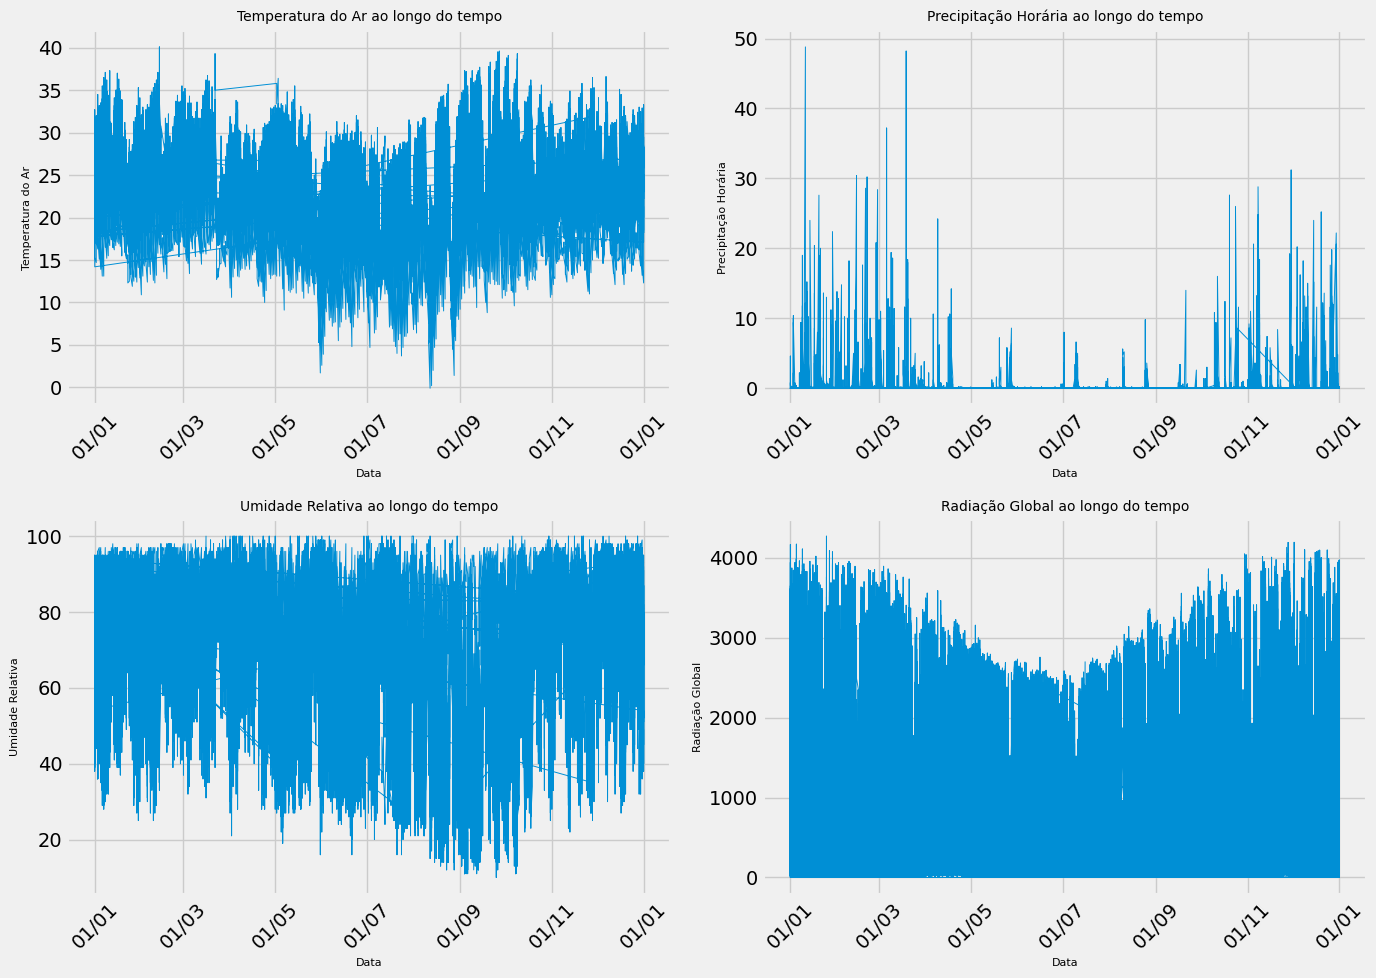

In [138]:
variaveis = [
    ('temperatura_do_ar_-_bulbo_seco,_horaria_(c)', 'Temperatura do Ar'),
    ('precipitacao_total,_horario_(mm)', 'Precipitação Horária'),
    ('umidade_relativa_do_ar,_horaria_(%)', 'Umidade Relativa'),
    ('radiacao_global_(kj/m2)', 'Radiação Global')
]

layout = """
AB
CD
"""

fig, axes = plt.subplot_mosaic(layout, figsize=(14, 10))

for (col, titulo), ax_id in zip(variaveis, ['A', 'B', 'C', 'D']):
    ax = axes[ax_id]
    ax.plot(df_sp['data'], df_sp[col], label=titulo, linewidth=0.7)
    ax.set_title(f'{titulo} ao longo do tempo', fontsize=10)
    ax.set_xlabel('Data', fontsize=8)
    ax.set_ylabel(titulo, fontsize=8)
    ax.grid(True)

    # Ajustes para melhorar visualização do eixo X
    ax.tick_params(axis='x', rotation=45)
    locator = AutoDateLocator()
    formatter = DateFormatter('%d/%m')
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

Gráficos acima:

Aqui nós podemos ver um padrão comportamental, em 3 dos nossos quatro gráficos, se pode ver que ha uma queda no meio, representando principalmente os meses de Maio, Junho e Julho, onde a Temperatura do ar, a precipitação horária e a Radiação diminuem, os dados utilizados, são do estado de São Paulo, ou seja, ele pega o final do outono e uma boa parte do inverno.

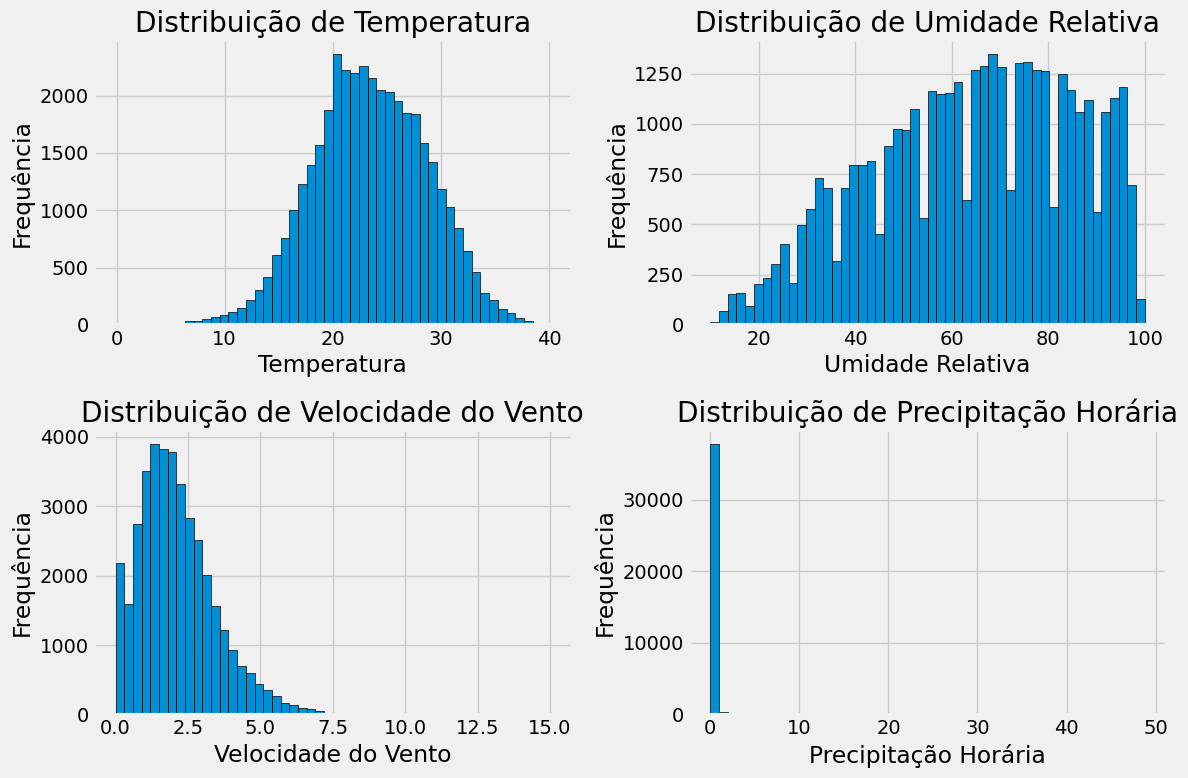

In [139]:
variaveis = [
    ('temperatura_do_ar_-_bulbo_seco,_horaria_(c)', 'Temperatura'),
    ('umidade_relativa_do_ar,_horaria_(%)', 'Umidade Relativa'),
    ('vento,_velocidade_horaria_(m/s)', 'Velocidade do Vento'),
    ('precipitacao_total,_horario_(mm)', 'Precipitação Horária')
]

layout = """
AB
CD
"""

fig, axes = plt.subplot_mosaic(layout, figsize=(12, 8))

for (col, titulo), ax_id in zip(variaveis, ['A', 'B', 'C', 'D']):
    ax = axes[ax_id]
    df_sp[col].hist(bins=50, ax=ax, edgecolor='black')
    ax.set_title(f'Distribuição de {titulo}')
    ax.set_xlabel(titulo)
    ax.set_ylabel('Frequência')
    ax.grid(True)

plt.tight_layout()
plt.show()

Aqui temos as analises de quantidade de dados de temperatura, umidade, velocidade do vento e precipitação

- Temperatura: a maior parte das temperaturas registradas no ano de 2024, é por volta dos 20°C, sendo que são mais de 2.000 registros dos 20°C até os 25°C, mais de 1.000 dados entre os 26°C e os 30°C.
- Umidade: logicamente não existem dados de umidade em 0, poucos registros abaixo de 20, apartir do 40, nós começamos a ter um bom aumento, chegando aos 750 registros, sendo o seu pico, por volta dos 70, passando dos 1.250 dados e depois tendo uma pequena queda até o dado com maior valor, sendo ele o 100, com menos de 200 registros.
- Velocidade do Vento: os dados são bem amontuados por baixo, começando com um pouco mais de 2.000 registros, tendo o seu pico perto dos 2.0, com quase 4.000 registros e apartir do 2.5, começamos uma drastica queda, chegando em menos de 500 dados com velocidade de 5.0 e o último sendo por volta dos 7.3.
- Precipitação: a precipitação é basicamente a mesma em todos os dados, sendo eles iguais a 0.

Com essa coleta, podemos ver que normalmente têm uma temperatura agradavel, com uma confortavel, sendo a maior parte entre 60% e 80% e ventos normais, em São Paulo, temos pouquíssimos eventos climaticos extremos, relacionados a ventos.

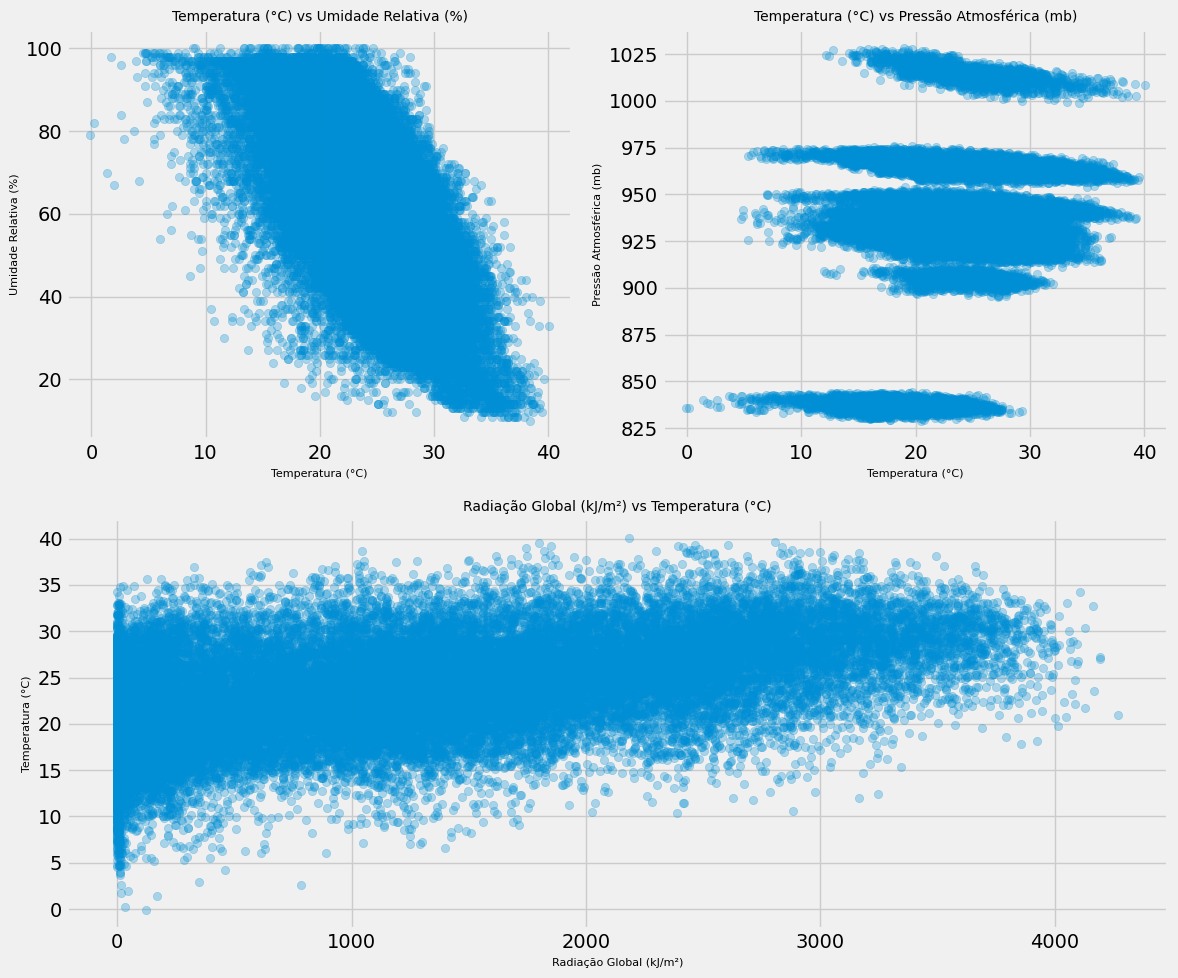

In [141]:
variaveis = {
    'temperatura_do_ar_-_bulbo_seco,_horaria_(c)': 'Temperatura (°C)',
    'umidade_relativa_do_ar,_horaria_(%)': 'Umidade Relativa (%)',
    'pressao_atmosferica_ao_nivel_da_estacao,_horaria_(mb)': 'Pressão Atmosférica (mb)',
    'radiacao_global_(kj/m2)': 'Radiação Global (kJ/m²)'
}

pares = [
    ('temperatura_do_ar_-_bulbo_seco,_horaria_(c)', 'umidade_relativa_do_ar,_horaria_(%)'),
    ('temperatura_do_ar_-_bulbo_seco,_horaria_(c)', 'pressao_atmosferica_ao_nivel_da_estacao,_horaria_(mb)'),
    ('radiacao_global_(kj/m2)', 'temperatura_do_ar_-_bulbo_seco,_horaria_(c)')
]

layout = """
AB
CC
"""

fig, axes = plt.subplot_mosaic(layout, figsize=(12, 10))

for (x, y), ax_id in zip(pares, ['A', 'B', 'C']):
    ax = axes[ax_id]
    sns.scatterplot(data=df_sp, x=x, y=y, ax=ax, alpha=0.3, edgecolor=None)
    nome_x = variaveis.get(x, x)
    nome_y = variaveis.get(y, y)
    ax.set_title(f'{nome_x} vs {nome_y}', fontsize=10)
    ax.set_xlabel(nome_x, fontsize=8)
    ax.set_ylabel(nome_y, fontsize=8)
    ax.grid(True)

plt.tight_layout()
plt.show()


Os gráficos mostram diretamente a relação de temperatura com a umidade, com a pressão e com a radiação:
- Gráfico 1: aqui nós podemos ver que a umidade é diretamente conectada com a temperatura, ao relacionarmos que quanto maior a temperatura, menor a umidade, tendo aos 10°C, uma média de 80% de umidade, já na maior temperatura, perto dos 40°C, a umidade fica majoritariamente abaixo dos 20%.
- Gráfico 2: neste gráfico, de temperatura e pressão atmosférica, vemos que são dados um pouco mais equilibrados, mas também com diferenças claras, a pressão atmosférica abaixo de 850, só aparece até os 30°C, enquanto a pressão na casa dos 900, fica majoritariamente entre 7°C e 40°C, já os dados acima de 1.000, são encontrados apartir dos 15°C, sendo eles majoritariamente na casa dos 20°C.
- Gráfico 3: os raios solares também estão completamente relacionados a temperatura, quanto menor a temperatura, menor a radiação, até os 10°C, a radiação mal chega a 2.000, aos 20°C, os dados mostram que já passamos dos 3.000 e aos 30°C, temos o nosso pico, chegando aos 4.000.

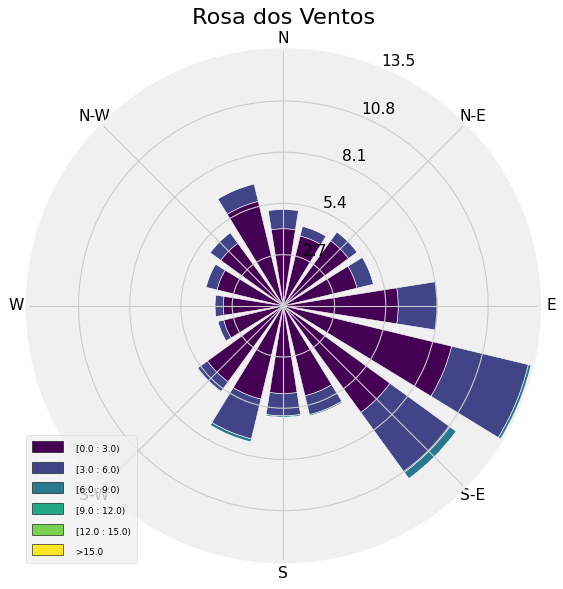

In [72]:
direcao = df_sp['vento,_direcao_horaria_(gr)_(_(gr))']
velocidade = df_sp['vento,_velocidade_horaria_(m/s)']

ax = WindroseAxes.from_ax()
ax.bar(direcao, velocidade, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Rosa dos Ventos')
plt.show()

Um gráfico no estilo Rosa-dos-ventos, onde vemos as direções, como uma bússola, mostrando as direções em que os ventos vão, neste gráfico, é visto que a maior parte dos ventos, vão a sudeste, em direção ao Oceano Atlântico, também tendo uma certa quantidade de ventos para Leste e para o Sul e uma quantidade e força dos ventos baixíssimas, entre o Nordeste e o Oeste.

# Treinamento de Modelo

In [74]:
drop_cols = ['data', 'hora_utc', 'estacao', 'datahora']
df_sp.drop(columns=drop_cols, inplace=True)

le = LabelEncoder()
df_sp['classificacao'] = le.fit_transform(df_sp['classificacao'])

df_alerta = df_sp[df_sp['classificacao'] == le.transform(['ALERTA'])[0]]
df_normal = df_sp[df_sp['classificacao'] == le.transform(['NORMAL'])[0]]

df_normal_sampled = resample(
    df_normal,
    replace=False,
    n_samples=len(df_alerta) * 3,
    random_state=42
)

df_bal = pd.concat([df_alerta, df_normal_sampled])
df_bal = df_bal.sample(frac=1, random_state=42).reset_index(drop=True)

X = df_bal.drop(columns=['precipitacao_total,_horario_(mm)', 'classificacao'])
y = df_bal['classificacao']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_smote, y_train_smote)
y_pred_rf = rf.predict(X_test)

print(f"Acurácia geral: {accuracy_score(y_test, y_pred_rf) * 100:.2f}%")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

Acurácia geral: 92.66%
              precision    recall  f1-score   support

      ALERTA       0.85      0.86      0.85       153
      NORMAL       0.95      0.95      0.95       460

    accuracy                           0.93       613
   macro avg       0.90      0.91      0.90       613
weighted avg       0.93      0.93      0.93       613



C:\Users\lucas\AppData\Local\Temp\ipykernel_24380\3699081238.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importance.values, y=feat_importance.index, palette="viridis")


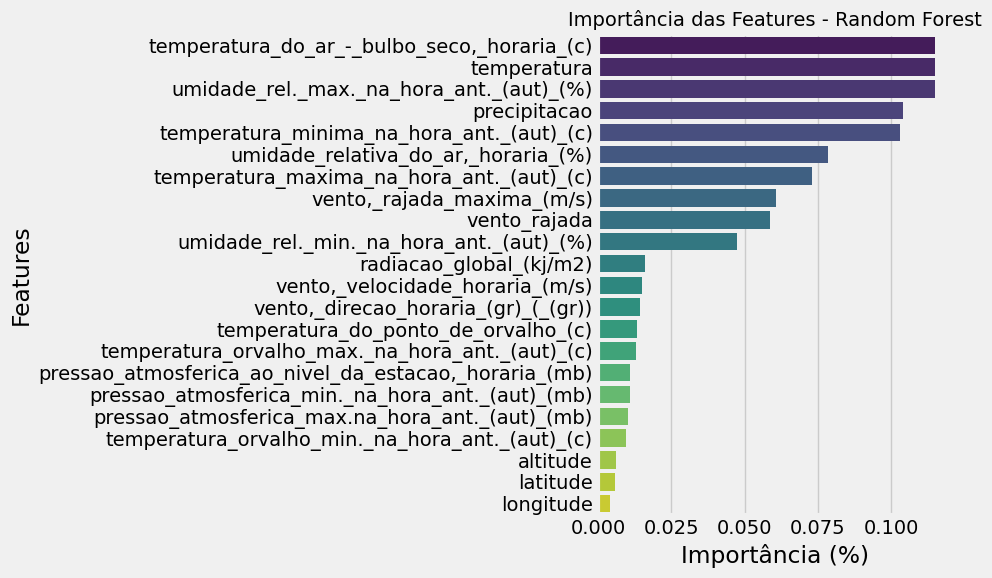

In [75]:
feature_names = X.columns
importances = rf.feature_importances_
feat_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importance.values, y=feat_importance.index, palette="viridis")
plt.title("Importância das Features - Random Forest", fontsize=14)
plt.xlabel("Importância (%)")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

O gráfico acima, mostra o nível de relevancia de cada coluna, para o treinamento do modelo, ajudado a idêntificar colunas que possam estar "sabotando" o treinamento, fazendo com que o modelo não de fato "aprenda" e sim decore.

# Integração com o MongoDB

In [76]:
client = MongoClient("mongodb://localhost:27017/")
db = client["ROPZ"]
colecao = db["ROPZ_Pred"]

estacoes = colecao.distinct("estacao", {"classificacao": {"$exists": False}})

print("Estações disponíveis no banco (sem classificação):")
for i, est in enumerate(estacoes, 1):
    print(f"{i}. {est}")

Estações disponíveis no banco (sem classificação):
1. CAMPOS DO JORDAO
2. FRANCA
3. IGUAPE
4. ITAPEVA
5. PRESIDENTE PRUDENTE
6. PRESIDENTE VENCESLAU
7. SAO CARLOS
8. SAO MIGUEL ARCANJO


Conexão com o banco, puxando os nomes das Cidades, onde nós temos dados salvos no banco

In [77]:
estacao_escolhida = input("Digite o nome da estação desejada: ").strip()
estacao_escolhida = estacao_escolhida.upper()

dados_estacao = list(colecao.find({"estacao": estacao_escolhida}))

print(f"\nDados da estação: {estacao_escolhida}")
for i, doc in enumerate(dados_estacao):
    print(doc)
    if i >= 4:
        break

df_original = pd.DataFrame(dados_estacao)

df_analise = df_original.copy()
df_analise


Dados da estação: SAO CARLOS
{'_id': ObjectId('68420716a22834e1fbd793f7'), 'data': '2024/06/28', 'hora': '1500 UTC', 'pressao_min': 920.9, 'pressao_max': 921.6, 'pressao_inst': 921, 'radiacao': 1646.8, 'temp_max': 25.5, 'temp_min': 18.4, 'temp_med': 25.5, 'temp_orvalho_max': 15, 'temp_orvalho_min': 11.5, 'temp_orvalho_med': 13.6, 'umid_max': 61, 'umid_min': 33, 'umid_med': 41.6, 'vento_dir': 153, 'vento_vel': 2.3, 'vento_raj': 5.3, 'estacao': 'SAO CARLOS', 'lat': -21.980278, 'lon': -47.883889, 'alt': 859.29, 'precipitacao': 0, 'temperatura': 25.5, 'vento_rajada': 5.3}


,_id,data,hora,pressao_min,pressao_max,pressao_inst,radiacao,temp_max,temp_min,temp_med,temp_orvalho_max,temp_orvalho_min,temp_orvalho_med,umid_max,umid_min,umid_med,vento_dir,vento_vel,vento_raj,estacao,lat,lon,alt,precipitacao,temperatura,vento_rajada
0,68420716a22834e1fbd793f7,2024/06/28,1500 UTC,920.90,921.60,921,1646.80,25.50,18.40,25.50,15,11.50,13.60,61,33,41.60,153,2.30,5.30,SAO CARLOS,-21.98,-47.88,859.29,0,25.50,5.30


Escolhendo a cidade que será analisada, buscando os dados sobre a cidade selecionada, trazendo os dados, colocando eles em um dataframe e criando uma cópia do dataframe para ser modificado para que se encaixe na predição.

In [78]:
colunas_para_remover = ['_id', 'estacao', 'data', 'hora']
df_analise.drop(columns=colunas_para_remover, inplace=True)

mapeamento_colunas = {
    'pressao_inst': 'pressao_atmosferica_ao_nivel_da_estacao,_horaria_(mb)',
    'pressao_max': 'pressao_atmosferica_max.na_hora_ant._(aut)_(mb)',
    'pressao_min': 'pressao_atmosferica_min._na_hora_ant._(aut)_(mb)',
    'radiacao': 'radiacao_global_(kj/m2)',
    'temp_med': 'temperatura_do_ar_-_bulbo_seco,_horaria_(c)',
    'temp_orvalho_med': 'temperatura_do_ponto_de_orvalho_(c)',
    'temp_max': 'temperatura_maxima_na_hora_ant._(aut)_(c)',
    'temp_min': 'temperatura_minima_na_hora_ant._(aut)_(c)',
    'temp_orvalho_max': 'temperatura_orvalho_max._na_hora_ant._(aut)_(c)',
    'temp_orvalho_min': 'temperatura_orvalho_min._na_hora_ant._(aut)_(c)',
    'umid_max': 'umidade_rel._max._na_hora_ant._(aut)_(%)',
    'umid_min': 'umidade_rel._min._na_hora_ant._(aut)_(%)',
    'umid_med': 'umidade_relativa_do_ar,_horaria_(%)',
    'vento_dir': 'vento,_direcao_horaria_(gr)_(_(gr))',
    'vento_raj': 'vento,_rajada_maxima_(m/s)',
    'vento_vel': 'vento,_velocidade_horaria_(m/s)',
    'lat': 'latitude',
    'lon': 'longitude',
    'alt': 'altitude',
    'precipitacao': 'precipitacao',
    'temperatura': 'temperatura',
    'vento_rajada': 'vento_rajada'
}
df_analise.rename(columns=mapeamento_colunas, inplace=True)

Removendo colunas que não serão utilizadas e trocando os nomes das colunas para que o modelo consiga fazer a predição.

In [79]:
previsao = rf.predict(df_analise)

if previsao == 0:
    previsao = 'NORMAL'
else:
    previsao = 'ALERTA'
    
df_original["classificacao"] = previsao

df_original

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,_id,data,hora,pressao_min,pressao_max,pressao_inst,radiacao,temp_max,temp_min,temp_med,temp_orvalho_max,temp_orvalho_min,temp_orvalho_med,umid_max,umid_min,umid_med,vento_dir,vento_vel,vento_raj,estacao,lat,lon,alt,precipitacao,temperatura,vento_rajada,classificacao
0,68420716a22834e1fbd793f7,2024/06/28,1500 UTC,920.90,921.60,921,1646.80,25.50,18.40,25.50,15,11.50,13.60,61,33,41.60,153,2.30,5.30,SAO CARLOS,-21.98,-47.88,859.29,0,25.50,5.30,NORMAL


Fazendo a predição, fazendo um if, para que nomeie o resultado da predição e adicionando o resultado ao dataframe original

In [80]:
updates = []

for _, row in df_original.iterrows():
    filtro = {"_id": ObjectId(row["_id"])}
    atualizacao = {"$set": {"classificacao": str(row["classificacao"])}}
    updates.append(UpdateOne(filtro, atualizacao))

if updates:
    resultado = colecao.bulk_write(updates)
    print(f"{resultado.modified_count} documento(s) atualizados com sucesso no MongoDB.")
else:
    print("Nenhum dado para atualizar.")

1 documento(s) atualizados com sucesso no MongoDB.


Pegando o _id do dado analisado, pegando o resultado da classificação e adicionando a coluna de "classificacao" no banco de dados, utilizando um UPDATE.